# Diabetes prediction

## About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset would be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

**Understanding the data**

*Gender*: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

*Age*: Age is an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0-80 in our dataset.

*Hypertension*: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values of 0 as False, and 1 as True

*Heart disease*: Heart disease is another medical condition that is associated with an increased risk of developing diabetes.

*BMI*: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes

*HbA1c*: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

*Blood glucose*: Blood glucose level refers to the amount of glucose in the bloodstream at a given time.

*Diabetes*: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes

In [1]:
import os
import pandas as pd

In [2]:
os.getcwd()

'C:\\Users\\WELLS\\Documents\\rebuilding portfolio projects\\machine learning\\diabetes prediction'

In [3]:
df = pd.read_csv(r'C:\\Users\\WELLS\\Documents\\rebuilding portfolio projects\\machine learning\\diabetes prediction\\diabetes_prediction_dataset.csv')

In [4]:
df.shape

(100000, 9)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# getting the unique values the smoking_history varaible is holding
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

### Data Cleaning

In [7]:
# checking for missing values, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


----

With a total observations of 100,000 rows, we have a non-null total of 100,000, therefore the dataset contains no missing values

----

In [8]:
# checking for duplicates
duplicates = df.duplicated()

In [9]:
df['duplicates'] = duplicates

In [10]:
# filter rows that contains duplicates
df_filtered = df[df.duplicates == False]

In [11]:
df_filtered.shape

(96146, 10)

In [12]:
print("The total rows that contained duplicates is {}".format(100000 - 96146))

The total rows that contained duplicates is 3854


**Performing a statistical test on the smoking variable with the target variable, to understand if it is a predictive variable on the target**

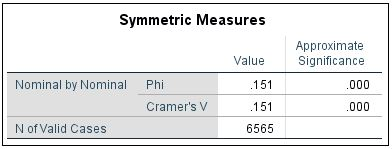

This Symmetric measures has a range of 0 - 1, indicating (small effect - large effect), this implies that the predictor variable (smoking_history) has a very very little effect on the target variable (diabetes), and would not be added in building our model

In [13]:
# dropping the duplicates, smoking_history column
df_filtered.drop(columns = ['duplicates', 'smoking_history'], inplace = True)

C:\Users\WELLS\AppData\Local\Temp\ipykernel_14144\132375567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns = ['duplicates', 'smoking_history'], inplace = True)


In [14]:
# filtering out the gender column that contains "other"
df_filtered = df_filtered[df_filtered.gender != 'Other']

### Data Processing

In [15]:
df_filtered.gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
# mapping the gender column to Male : 1, Female : 0
df_filtered['gender'] = df_filtered['gender'].map({'Male': 1, 'Female': 0})

In [17]:
df_filtered.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


In [18]:
X = df_filtered.drop(columns = ['diabetes'])

In [19]:
y = df_filtered['diabetes']

In [20]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

## Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)

(76902, 7)
(19226, 7)


In [25]:
print(y_train.shape)
print(y_test.shape)

(76902,)
(19226,)


In [26]:
# scaling numeric features
standard_scaler = StandardScaler()

In [27]:
numeric_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [28]:
standard_scaler.fit(X_train[numeric_cols])

StandardScaler()

In [30]:
import joblib
# Save the scaler
joblib.dump(standard_scaler, 'scaler.joblib')

['scaler.joblib']

In [31]:
X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])

In [32]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
39756,-0.845120,-1.501708,-0.288793,-0.206118,-1.686520,-1.895434,-1.178336
75304,1.183263,1.032334,3.462687,4.851595,0.175549,3.039956,0.165844
19765,1.183263,0.987877,3.462687,-0.206118,0.944633,-0.684866,-1.422733
97291,1.183263,0.321024,-0.288793,-0.206118,-0.807990,-0.498625,-0.200751
37660,-0.845120,-0.701484,-0.288793,-0.206118,-0.791721,0.153219,0.483559


### Logistic Regression using the standard scaling 

In [33]:
log_model = LogisticRegression(random_state = 42, class_weight = 'balanced')

In [34]:
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [35]:
train_pred = log_model.predict(X_train)

In [36]:
test_pred = log_model.predict(X_test)

In [37]:
conf_matrix_train = confusion_matrix(y_train, train_pred)
print(conf_matrix_train)

[[62268  7853]
 [  811  5970]]


In [38]:
train_report = classification_report(y_train, train_pred)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     70121
           1       0.43      0.88      0.58      6781

    accuracy                           0.89     76902
   macro avg       0.71      0.88      0.76     76902
weighted avg       0.94      0.89      0.90     76902



In [39]:
print("-------------------------------------")
print("test accuracy: {}".format(accuracy_score(y_test, test_pred)))
print("test recall: {}".format(recall_score(y_test, test_pred)))
print("test precision: {}".format(precision_score(y_test, test_pred)))

-------------------------------------
test accuracy: 0.8832310412982419
test recall: 0.8700764256319812
test precision: 0.4223744292237443


In [40]:
conf_matrix_test = confusion_matrix(y_test, test_pred)
print(conf_matrix_test)

[[15501  2024]
 [  221  1480]]


In [41]:
test_report = classification_report(y_test, test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17525
           1       0.42      0.87      0.57      1701

    accuracy                           0.88     19226
   macro avg       0.70      0.88      0.75     19226
weighted avg       0.94      0.88      0.90     19226



In [42]:
# Using Grid Search to tune and find the best hyperparameters that increases the recall

'''log_model = LogisticRegression(random_state = 42)
params = {
    'penalty' : ['l2', None],
    'dual' : [False, True],
    'C' : [0.001, 0.01, 0.1],
    'fit_intercept' : [True, False],
    'class_weight' : [None, 'balanced'],
    'solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
    'max_iter': [10, 50, 100, 200],
    'warm_start': [True, False],
}

grid_search = GridSearchCV(estimator = log_model, param_grid = params, cv=5, scoring = 'f1')

grid_search.fit(X_train, y_train)

# Get the best model from the search
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_

train_pred = grid_search.predict(X_train)
test_pred = grid_search.predict(X_test)

# Evaluate the train metric
train_report = classification_report(y_train, train_pred)
print(train_report)

conf_matrix_train = confusion_matrix(y_train, train_pred)
print(conf_matrix_train)

# Evaluate the test metric
test_report = classification_report(y_test, test_pred)
print(test_report)

conf_matrix_test = confusion_matrix(y_test, test_pred)
print(conf_matrix_test)

print(best_svm_model)
print(best_params)'''

"log_model = LogisticRegression(random_state = 42)\nparams = {\n    'penalty' : ['l2', None],\n    'dual' : [False, True],\n    'C' : [0.001, 0.01, 0.1],\n    'fit_intercept' : [True, False],\n    'class_weight' : [None, 'balanced'],\n    'solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],\n    'max_iter': [10, 50, 100, 200],\n    'warm_start': [True, False],\n}\n\ngrid_search = GridSearchCV(estimator = log_model, param_grid = params, cv=5, scoring = 'f1')\n\ngrid_search.fit(X_train, y_train)\n\n# Get the best model from the search\nbest_svm_model = grid_search.best_estimator_\nbest_params = grid_search.best_params_\n\ntrain_pred = grid_search.predict(X_train)\ntest_pred = grid_search.predict(X_test)\n\n# Evaluate the train metric\ntrain_report = classification_report(y_train, train_pred)\nprint(train_report)\n\nconf_matrix_train = confusion_matrix(y_train, train_pred)\nprint(conf_matrix_train)\n\n# Evaluate the test metric\ntest_report = classification_report(y_test, test_pre

In [43]:
model = LogisticRegression(random_state = 42, class_weight = 'balanced')
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_report = classification_report(y_train, train_pred)
print(train_report)

test_report = classification_report(y_test, test_pred)
print(test_report)

conf_matrix_train = confusion_matrix(y_train, train_pred)
print(conf_matrix_train)

conf_matrix_test = confusion_matrix(y_test, test_pred)
print(conf_matrix_test)

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     70121
           1       0.43      0.88      0.58      6781

    accuracy                           0.89     76902
   macro avg       0.71      0.88      0.76     76902
weighted avg       0.94      0.89      0.90     76902

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17525
           1       0.42      0.87      0.57      1701

    accuracy                           0.88     19226
   macro avg       0.70      0.88      0.75     19226
weighted avg       0.94      0.88      0.90     19226

[[62268  7853]
 [  811  5970]]
[[15501  2024]
 [  221  1480]]


In [44]:
model = LogisticRegression(random_state = 42, class_weight = 'balanced', C = 0.001, max_iter = 10)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, train_pred)
print(conf_matrix_train)

conf_matrix_test = confusion_matrix(y_test, test_pred)
print(conf_matrix_test)

train_report = classification_report(y_train, train_pred)
print(train_report)

test_report = classification_report(y_test, test_pred)
print(test_report)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[62511  7610]
 [  819  5962]]
[[15572  1953]
 [  223  1478]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     70121
           1       0.44      0.88      0.59      6781

    accuracy                           0.89     76902
   macro avg       0.71      0.89      0.76     76902
weighted avg       0.94      0.89      0.91     76902

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     17525
           1       0.43      0.87      0.58      1701

    accuracy                           0.89     19226
   macro avg       0.71      0.88      0.76     19226
weighted avg       0.94      0.89      0.90     19226



In [45]:
print("accuracy: {}".format(accuracy_score(y_test, test_pred)))
print("recall: {}".format(recall_score(y_test, test_pred)))

accuracy: 0.8868199313429731
recall: 0.8689006466784245


Logistic Regression Model gives us an accuracy of **89%** and a recall of **87%** on the test data

Why are we using the recall metric in coresspondance to the accuracy?

Because, the cost of predicting a class to be non-diabetic when it is actually diabetic is high.

In a real-world context, let's consider a medical diagnosis scenario where the positive class corresponds to a severe medical condition (e.g., cancer). The cost of missing a positive case (false negatives) is high because it means failing to diagnose a critical condition.

### Random Forest Classifier

In [46]:
model2 = RandomForestClassifier(random_state = 42)
model2.fit(X_train, y_train)

train_pred2 = model2.predict(X_train)
test_pred2 = model2.predict(X_test)

train_report2 = classification_report(y_train, train_pred2)
print(train_report2)

test_report2 = classification_report(y_test, test_pred2)
print(test_report2)

conf_matrix_train2 = confusion_matrix(y_train, train_pred2)
print(conf_matrix_train2)

conf_matrix_test2 = confusion_matrix(y_test, test_pred2)
print(conf_matrix_test2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70121
           1       1.00      0.98      0.99      6781

    accuracy                           1.00     76902
   macro avg       1.00      0.99      0.99     76902
weighted avg       1.00      1.00      1.00     76902

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.92      0.67      0.78      1701

    accuracy                           0.97     19226
   macro avg       0.94      0.83      0.88     19226
weighted avg       0.96      0.97      0.96     19226

[[70106    15]
 [  135  6646]]
[[17427    98]
 [  559  1142]]


In [ ]:
'''Using Grid Search to tune and find the best hyperparameters that increases the recall

model2 = RandomForestClassifier(random_state = 42)
params = {
    'n_estimators' : [10, 50, 100],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [10, 50, 100],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3],
    'max_features' : ['sqrt', 'log2', None],
    'max_leaf_nodes': [2, 3, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = model2, param_grid = params, cv=5, scoring = 'recall')

grid_search.fit(X_train, y_train)

# Get the best model from the search
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_

train_pred = grid_search.predict(X_train)
test_pred = grid_search.predict(X_test)

# Evaluate the train metric
train_report = classification_report(y_train, train_pred)
print(train_report)

conf_matrix_train = confusion_matrix(y_train, train_pred)
print(conf_matrix_train)

# Evaluate the test metric
test_report = classification_report(y_test, test_pred)
print(test_report)

conf_matrix_test = confusion_matrix(y_test, test_pred)
print(conf_matrix_test)

print(best_svm_model)
print(best_params)'''

In [47]:
model2 = RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_depth = 10, max_leaf_nodes = 10, min_samples_leaf = 10, max_samples = 1001)
model2.fit(X_train, y_train)

train_pred = model2.predict(X_train)
test_pred = model2.predict(X_test)

# Evaluate the train metric
train_report = classification_report(y_train, train_pred)
print(train_report)

conf_matrix_train = confusion_matrix(y_train, train_pred)
print(conf_matrix_train)

# Evaluate the test metric
test_report = classification_report(y_test, test_pred)
print(test_report)

conf_matrix_test = confusion_matrix(y_test, test_pred)
print(conf_matrix_test)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     70121
           1       0.51      0.89      0.65      6781

    accuracy                           0.92     76902
   macro avg       0.75      0.90      0.80     76902
weighted avg       0.95      0.92      0.93     76902

[[64437  5684]
 [  764  6017]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17525
           1       0.51      0.88      0.65      1701

    accuracy                           0.92     19226
   macro avg       0.75      0.90      0.80     19226
weighted avg       0.95      0.92      0.93     19226

[[16108  1417]
 [  208  1493]]


In [48]:
print("accuracy: {}".format(accuracy_score(y_test, test_pred)))
print("recall: {}".format(recall_score(y_test, test_pred)))

accuracy: 0.9154790388016228
recall: 0.8777189888300999


Random Forest Classifier Model gave us an accuracy of **92%** and a recall of **88%** on the test data

Now, as we can see from the both model, Random Forest Model is a better choice for this set of data, and on our project aim.

In [49]:
# extracting the model for the web application build up
import joblib

# Saving the trained model to a file
joblib.dump(model2, 'trained_model2.joblib')

['trained_model2.joblib']

In [51]:
# defining a function that collects users input, convert to a dataframe, preprocesses the data, and make predictions with
# a degree of certainty

import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

def prediction(gender, age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level):

    dic = {
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension], 
        'heart_disease': [heart_disease], 
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    }
    
    user_input = pd.DataFrame(dic)
    
    numeric_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
    
    # mapping the gender column to Male : 1, Female : 0
    user_input['gender'] = user_input['gender'].map({'Male': 1, 'Female': 0})
    user_input['hypertension'] = user_input['hypertension'].map({'Yes': 1, 'No': 0})
    user_input['heart_disease'] = user_input['heart_disease'].map({'Yes': 1, 'No': 0})
    
    loaded_scaler = joblib.load('scaler.joblib')
    user_input[numeric_cols] = loaded_scaler.transform(user_input[numeric_cols])
    
    print(user_input)
    
    loaded_model = joblib.load('trained_model2.joblib')
    pred = loaded_model.predict(user_input)
    pred_proba = loaded_model.predict_proba(user_input)
    
    if pred == 1:
        return True, pred_proba[:, 1]
    
    else:
        return False, pred_proba[:, 0]


In [78]:
diabetes, proba = prediction('Female', 80, 'No', 'No', 150, 1, 160)

    gender       age  hypertension  heart_disease        bmi  HbA1c_level  \
0 -0.84512  1.699187     -0.288793      -0.206118  18.146962    -4.223448   

   blood_glucose_level  
0             0.532439  


In [79]:
print(diabetes)
print(proba)

False
[0.72249321]


In [80]:
model2.feature_importances_

array([0.00435709, 0.19628533, 0.03472049, 0.01305892, 0.11403999,
       0.35179304, 0.28574514])

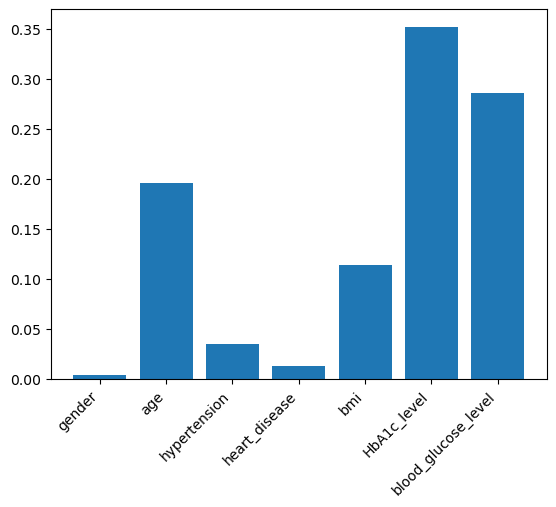

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.bar(x = X.columns, height = model2.feature_importances_);
plt.xticks(rotation=45, ha='right');